In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 800)  # displays complete text
pd.set_option('float_format', '{:.2f}'.format) # displays float with 2 decimal spaces

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score,cross_val_predict
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [3]:
np.random.seed(42)
# Read the excel sheet using pandas
bidsData = pd.read_csv('Dataset/ModelData.csv')

# display the 1st 2 rows
bidsData.head(2)

,proj_ID,seq_no,time,estimate,let_date,length,winner,win_amt,num_bids,bid_spread,...,26,27,28,29,30,31,32,33,34,35
0,NH 1602(247),3001,1000,85290427.93,12/1/2016,0.39,WILLIAMS BROTHERS CONSTRUCTION CO. INC.,73929401.69,7,13677444.11,...,COX PAVING OF TEXAS INC.,1878411.95,STRIPING TECHNOLOGY L.P.,978681.96,TRP CONSTRUCTION GROUP LLC,1145234.66,TOTAL HIGHWAY MAINTENANCE LLC,1183874.61,STRIPE-A-ZONE INC.,814705.32
1,NH 2017(364),3005,70,9271227.00,12/1/2016,245.98,LIPHAM ASPHALT AND PAVING COMPANY LLC,8458527.23,4,980483.12,...,COX PAVING OF TEXAS INC.,1878411.95,STRIPING TECHNOLOGY L.P.,978681.96,TRP CONSTRUCTION GROUP LLC,1145234.66,TOTAL HIGHWAY MAINTENANCE LLC,1183874.61,STRIPE-A-ZONE INC.,814705.32


## Modeling

In [10]:
bidsData['0'].unique()

array(['PULICE CONSTRUCTION INC. '], dtype=object)

In [9]:
X = bidsData[['time', 'estimate', 'length', 'num_bids']]
y = bidsData['winner']

### Test size as 0.5

train r2 score before ss:  0.9954827433358518
test r2 score before ss:  0.9815792267979184
CVV as 5:  [0.99363513 0.98495012 0.97239104 0.98133698 0.97314257]
Mean Square error is : 19098920.10533621
R^2 score after ss train  : -0.10904735323124215
R^2 score after ss test : -0.09688187045056695
Cross val score train:  0.9920468700452879
Cross Val score test:  0.9810911710858964


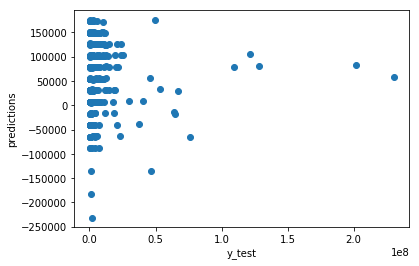

In [194]:
#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

lr = LinearRegression()
lr.fit(X_train, y_train)
print("train r2 score before ss: ",lr.score(X_train, y_train))
print("test r2 score before ss: ", lr.score(X_test, y_test))

ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

model = ss.fit_transform(X_train_scaled, y_train)

#  Plot predictions
predictions = lr.predict(X_test_scaled)

plt.scatter(y_test, predictions)
plt.xlabel('y_test')

plt.ylabel('predictions')

# CVV, MSE ad R2 score
print('CVV as 5: ', cross_val_score(lr, X_test_scaled, y_test, cv=5))
print("Mean Square error is :", np.sqrt(mean_squared_error(y_test, lr.predict(X_test_scaled))))
print("R^2 score after ss train  :", r2_score(y_train, lr.predict(X_train_scaled)))
print("R^2 score after ss test :", r2_score(y_test, lr.predict(X_test_scaled)))
pd.DataFrame({'variable': X.columns, f'_coefficient': lr.coef_}).sort_values(by=f'_coefficient')
print('Cross val score train: ',cross_val_score(LinearRegression(), X_train, y_train, cv=5).mean())
print("Cross Val score test: ", cross_val_score(LinearRegression(), X_test_scaled, y_test, cv=5).mean())

In [195]:
test_dataSet = X_test.copy()
test_dataSet['Prediction']= predictions

test_dataSet['Actual'] = y_test
test_dataSet['Variance'] = predictions - y_test

test_dataSet.head()

,time,estimate,length,num_bids,Prediction,Actual,Variance
940,84,3526078.05,3.37,4,101912.11,2807514.44,-2705602.33
986,280,5208994.70,0.53,6,54982.13,4253525.11,-4198542.98
405,120,475030.50,0.01,3,125852.07,455673.00,-329820.93
721,240,1919491.30,0.20,2,150062.86,1699468.02,-1549405.16
1610,360,12492719.18,11.44,5,79012.78,11187471.33,-11108458.55


In [196]:
kf =KFold(n_splits=3, shuffle=True, random_state=42)

for train_indices, test_indices in kf.split(X, y):
#     print('train' ,train_indices)
#     print('test' ,test_indices)
#     print('')
    X_train_fold = X.loc[train_indices, :] 
    X_test_fold = X.loc[test_indices, :]
    y_train_fold = y[train_indices] 
    y_test_fold = y[test_indices]
    fold_lr = LinearRegression()
    fold_lr.fit(X_train_fold, y_train_fold)
    print(fold_lr.score(X_test_fold, y_test_fold))

0.9816068506491046
0.994826536737806
0.9930608256636176


### Test size as 0.3

train r2 score before ss:  0.9890595515167977
test r2 score before ss:  0.9959263426278918
CVV as 5:  [0.99437335 0.98446748 0.99909709 0.99491594 0.99763112]
Mean Square error is : 19270504.081681307
R^2 score after ss train  : -0.11292656938955337
R^2 score after ss test : -0.0843940780475756
Cross val score train:  0.9889615854995547
Cross Val score test:  0.9940969931066597


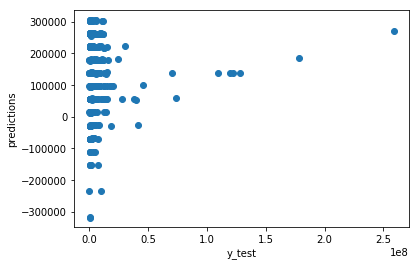

In [197]:
#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

lr = LinearRegression()
lr.fit(X_train, y_train)
print("train r2 score before ss: ",lr.score(X_train, y_train))
print("test r2 score before ss: ", lr.score(X_test, y_test))

ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

model = ss.fit_transform(X_train_scaled, y_train)
#  Plot predictions
predictions = lr.predict(X_test_scaled)

plt.scatter(y_test, predictions)
plt.xlabel('y_test')

plt.ylabel('predictions')

# CVV, MSE ad R2 score
print('CVV as 5: ', cross_val_score(lr, X_test_scaled, y_test, cv=5))
print("Mean Square error is :", np.sqrt(mean_squared_error(y_test, lr.predict(X_test_scaled))))
print("R^2 score after ss train  :", r2_score(y_train, lr.predict(X_train_scaled)))
print("R^2 score after ss test :", r2_score(y_test, lr.predict(X_test_scaled)))
pd.DataFrame({'variable': X.columns, f'_coefficient': lr.coef_}).sort_values(by=f'_coefficient')
print('Cross val score train: ',cross_val_score(LinearRegression(), X_train, y_train, cv=5).mean())
print("Cross Val score test: ", cross_val_score(LinearRegression(), X_test_scaled, y_test, cv=5).mean())



In [198]:
test_dataSet = X_test.copy()
test_dataSet['Prediction']= predictions

test_dataSet['Actual'] = y_test
test_dataSet['Variance'] = predictions - y_test

test_dataSet.head()

,time,estimate,length,num_bids,Prediction,Actual,Variance
52,93,532514.13,0.20,6,96435.76,412715.00,-316279.24
679,86,1430045.50,1.26,6,96396.28,1562281.63,-1465885.35
969,548,905020.00,18.69,2,264250.59,1174127.00,-909876.41
1251,120,906325.50,0.01,5,138036.12,827634.40,-689598.28
203,187,2164831.00,16.34,6,96735.35,1557630.87,-1460895.52


In [199]:
kf =KFold(n_splits=3, shuffle=True, random_state=42)

for train_indices, test_indices in kf.split(X, y):
#     print('train' ,train_indices)
#     print('test' ,test_indices)
#     print('')
    X_train_fold = X.loc[train_indices, :] 
    X_test_fold = X.loc[test_indices, :]
    y_train_fold = y[train_indices] 
    y_test_fold = y[test_indices]
    fold_lr = LinearRegression()
    fold_lr.fit(X_train_fold, y_train_fold)
    print(fold_lr.score(X_test_fold, y_test_fold))

0.9816068506491046
0.994826536737806
0.9930608256636176


### Test size as 0.1

train r2 score before ss:  0.9917043147867634
test r2 score before ss:  0.9774605523693793
CVV as 5:  [0.93335838 0.97111859 0.98012849 0.93372302 0.96798755]
Mean Square error is : 7684261.920753863
R^2 score after ss train  : -0.10476554171812857
R^2 score after ss test : -0.2971751801137059
Cross val score train:  0.9921506914614204
Cross Val score test:  0.9572632070901201


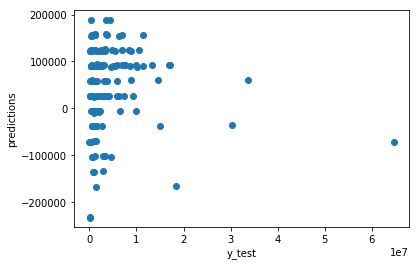

In [200]:
#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

lr = LinearRegression()
lr.fit(X_train, y_train)
print("train r2 score before ss: ",lr.score(X_train, y_train))
print("test r2 score before ss: ", lr.score(X_test, y_test))

ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

model = ss.fit_transform(X_train_scaled, y_train)

#  Plot predictions
predictions = lr.predict(X_test_scaled)

plt.scatter(y_test, predictions)
plt.xlabel('y_test')

plt.ylabel('predictions')

# CVV, MSE ad R2 score
print('CVV as 5: ', cross_val_score(lr, X_test_scaled, y_test, cv=5))
print("Mean Square error is :", np.sqrt(mean_squared_error(y_test, lr.predict(X_test_scaled))))
print("R^2 score after ss train  :", r2_score(y_train, lr.predict(X_train_scaled)))
print("R^2 score after ss test :", r2_score(y_test, lr.predict(X_test_scaled)))
pd.DataFrame({'variable': X.columns, f'_coefficient': lr.coef_}).sort_values(by=f'_coefficient')
print('Cross val score train: ',cross_val_score(LinearRegression(), X_train, y_train, cv=5).mean())
print("Cross Val score test: ", cross_val_score(LinearRegression(), X_test_scaled, y_test, cv=5).mean())




In [201]:
test_dataSet = X_test.copy()
test_dataSet['Prediction']= predictions

test_dataSet['Actual'] = y_test
test_dataSet['Variance'] = predictions - y_test

test_dataSet.head()

,time,estimate,length,num_bids,Prediction,Actual,Variance
151,541,19851943.94,0.59,12,-165275.17,18405188.99,-18570464.16
807,165,4572924.25,2.09,1,188223.66,4467052.10,-4278828.44
621,102,2753799.70,2.40,8,-38261.62,2680558.94,-2718820.56
966,88,4362510.30,135.00,5,57422.26,3761543.11,-3704120.85
1202,67,1812752.25,1.54,5,58498.10,1708497.38,-1649999.28


In [202]:
kf =KFold(n_splits=3, shuffle=True, random_state=42)

for train_indices, test_indices in kf.split(X, y):
#     print('train' ,train_indices)
#     print('test' ,test_indices)
#     print('')
    X_train_fold = X.loc[train_indices, :] 
    X_test_fold = X.loc[test_indices, :]
    y_train_fold = y[train_indices] 
    y_test_fold = y[test_indices]
    fold_lr = LinearRegression()
    fold_lr.fit(X_train_fold, y_train_fold)
    print(fold_lr.score(X_test_fold, y_test_fold))

0.9816068506491046
0.994826536737806
0.9930608256636176
